### Student Information
Name: 陳翼弘

Student ID: 103033617

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
# -- set up dataset environment-- #
import os
import os.path
import helpers.data_mining_helpers as dmh
import numpy as np
nas_folder_path = "NAS_NEAF/課程/2021_DataMining/sentiment labelled sentences/sentiment labelled sentences"
file_names = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']


In [2]:
# -- load dataset -- #
import csv

dataset = []
dataset_data = []
dataset_score = []
dataset_lib = []
dataset_lib_name = []
for index, file_name in enumerate(file_names):
    
    fileID = open(os.path.join(os.path.expanduser('~'), nas_folder_path, file_names[index]))
    dataset_temp = list(csv.reader(fileID, delimiter = "\t"))
    fileID.close()    
    # dataset_data_temp = [i[0] for i in dataset]
    # dataset_score_temp = [i[1] for i in dataset]
    
    dataset.extend(dataset_temp)
    dataset_data.extend([i[0] for i in dataset_temp])
    dataset_score.extend([i[1] for i in dataset_temp])
    dataset_lib.extend([int(index) for i in dataset_temp])
    dataset_lib_name.extend([file_name[:-13] for i in dataset_temp])

In [3]:
len(dataset_lib)

2748

In [4]:
# -- show firt # data -- #
dataset_lib_name

['amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells',
 'amazon_cells

In [5]:
dataset_data[0:2]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.']

In [6]:
print(file_names[dataset_lib[0]])

amazon_cells_labelled.txt


In [7]:
dataset_lib[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
import pandas as pd
# import helpers.data_mining_helpers as dmh


DS = pd.DataFrame(dataset, columns=['text', 'score'])

In [9]:
DS

,text,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [10]:
DS['lib_name'] = dataset_lib_name

In [11]:
DS['lib'] = dataset_lib

In [12]:
DS = DS.sample(frac=1).reset_index(drop=True)

In [13]:
DS

,text,score,lib_name,lib
0,Cooked to perfection and the service was impec...,1,yelp,2
1,"Nice quality build, unlike some cheap s*** out...",1,amazon_cells,0
2,We ordered the duck rare and it was pink and t...,1,yelp,2
3,Worst Customer Service Ever.,0,amazon_cells,0
4,I cannot believe that the actors agreed to do ...,0,imdb,1
...,...,...,...,...
2743,"Good case, Excellent value.",1,amazon_cells,0
2744,It was way over fried.,0,yelp,2
2745,"Great Subway, in fact it's so good when you co...",1,yelp,2
2746,"The food sucked, which we expected but it suck...",0,yelp,2


In [14]:
DS.iloc[::10, 0:2][0:10]

,text,score
0,Cooked to perfection and the service was impec...,1
10,Weird vibe from owners.,0
20,"But it is entertaining, nonetheless.",1
30,Logitech Bluetooth Headset is a 10!.,1
40,The design might be ergonomic in theory but I ...,0
50,I have recommended it to friends.,1
60,fast service.,1
70,This place was such a nice surprise!,1
80,The replacement died in a few weeks.,0
90,"Yeah, the movie pretty much sucked.",0


In [15]:
DS.loc[::10, 'text'][0:10]

0     Cooked to perfection and the service was impec...
10                              Weird vibe from owners.
20               But it is entertaining, nonetheless.  
30                 Logitech Bluetooth Headset is a 10!.
40    The design might be ergonomic in theory but I ...
50                  I have recommended it to friends.  
60                                        fast service.
70                 This place was such a nice surprise!
80                 The replacement died in a few weeks.
90                Yeah, the movie pretty much sucked.  
Name: text, dtype: object

In [16]:
DS.isnull()

,text,score,lib_name,lib
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2743,False,False,False,False
2744,False,False,False,False
2745,False,False,False,False
2746,False,False,False,False


In [17]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [18]:
DS.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [19]:
dummy_series = pd.Series(["dummy_record", "1"], index=["text", "score"])

In [20]:
dummy_series


text     dummy_record
score               1
dtype: object

In [21]:
result_with_series = DS.append(dummy_series, ignore_index=True)

In [22]:
result_with_series

,text,score,lib_name,lib
0,Cooked to perfection and the service was impec...,1,yelp,2.0
1,"Nice quality build, unlike some cheap s*** out...",1,amazon_cells,0.0
2,We ordered the duck rare and it was pink and t...,1,yelp,2.0
3,Worst Customer Service Ever.,0,amazon_cells,0.0
4,I cannot believe that the actors agreed to do ...,0,imdb,1.0
...,...,...,...,...
2744,It was way over fried.,0,yelp,2.0
2745,"Great Subway, in fact it's so good when you co...",1,yelp,2.0
2746,"The food sucked, which we expected but it suck...",0,yelp,2.0
2747,"However Paul Schrader has indeed made a film ""...",1,imdb,1.0


In [23]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [24]:
dummy_dict=[{'text':'dummy_record', 'score':'1'}]

In [25]:
DS = DS.append(dummy_dict, ignore_index=True)

In [26]:
len(DS)

2749

In [27]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


In [28]:
DS.dropna(inplace=True)

In [29]:
DS.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,lib_name,lib
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [30]:
len(DS)

2748

In [31]:
sum(DS.duplicated('text'))

17

In [32]:
DS.duplicated('text')

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [33]:
duplicate=DS[DS.duplicated('text')]

In [34]:
duplicate['text']

403                                         Does not fit.
980                                The food was terrible.
987                                         Great phone!.
1089                                         Works great.
1589                                         Great Phone.
1623    If you like a loud buzzing to override all you...
1625                              Don't buy this product.
1887                                   I love this place.
1888                     Excellent product for the price.
2028                                         Great phone.
2163                                This is a great deal.
2181                                        Works great!.
2301                                     I won't be back.
2349                     Definitely worth checking out.  
2504                                   Not recommended.  
2685                    I would not recommend this place.
2734                                              10/10  
Name: text, dt

In [35]:
DS.drop_duplicates(keep=False, inplace=True)

In [36]:
len(DS)

2714

In [37]:
DS_sample = DS.sample(n=1000)

In [38]:
DS_sample[0:4]

,text,score,lib_name,lib
202,I highly recommend this movie for anyone inter...,1,imdb,1.0
91,This one wants to surf on the small wave of sp...,0,imdb,1.0
151,A lady at the table next to us found a live gr...,0,yelp,2.0
563,Excellent sound quality.,1,amazon_cells,0.0


# Exercise 6 (take home)

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

yelp            992
amazon_cells    980
imdb            742
Name: lib_name, dtype: int64


<AxesSubplot:title={'center':'Library distribution'}>

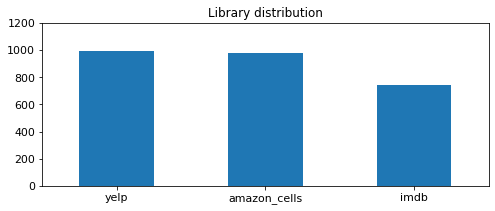

In [40]:
print(DS.lib_name.value_counts())
DS.lib_name.value_counts().plot(kind = 'bar',
                                title = 'Library distribution',
                                ylim = [0, 1200],
                                rot = 0, fontsize = 11, figsize = (8,3))

# Exercise 7

amazon_cells    365
yelp            359
imdb            276
Name: lib_name, dtype: int64


<AxesSubplot:title={'center':'Sample lib distribution'}>

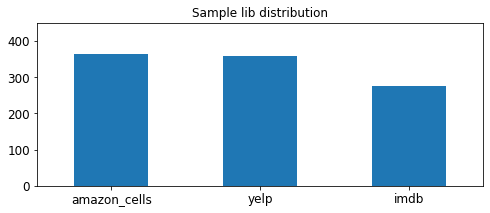

In [41]:
print(DS_sample.lib_name.value_counts())


# plot barchart for DS_sample
DS_sample.lib_name.value_counts().plot(kind = 'bar',
                                       title = 'Sample lib distribution',
                                       ylim = [0, 450],
                                       rot = 0, fontsize = 12, figsize = (8,3))

# Exercise 8

In [42]:
X = DS_sample.lib_name.value_counts().index

In [43]:
X_axis = np.arange(len(X))

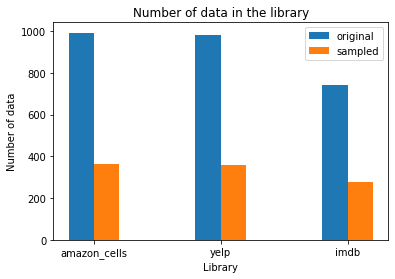

In [44]:
plt.bar(X_axis - 0.1, DS.lib_name.value_counts(), 0.2, label='original')
plt.bar(X_axis + 0.1, DS_sample.lib_name.value_counts(), 0.2, label='sampled')

plt.xticks(X_axis, X)
plt.xlabel("Library")
plt.ylabel("Number of data")
plt.title("Number of data in the library")
plt.legend()
plt.show()

# Feature Creation

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/neaf-2070/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
DS['unigrams'] = DS['text'].apply(lambda x: dmh.tokenize_text(x))

In [47]:
DS[0:4]["unigrams"]

0    [Cooked, to, perfection, and, the, service, wa...
1    [Nice, quality, build, ,, unlike, some, cheap,...
2    [We, ordered, the, duck, rare, and, it, was, p...
3                  [Worst, Customer, Service, Ever, .]
Name: unigrams, dtype: object

In [48]:
DS[0:4]

,text,score,lib_name,lib,unigrams
0,Cooked to perfection and the service was impec...,1,yelp,2.0,"[Cooked, to, perfection, and, the, service, wa..."
1,"Nice quality build, unlike some cheap s*** out...",1,amazon_cells,0.0,"[Nice, quality, build, ,, unlike, some, cheap,..."
2,We ordered the duck rare and it was pink and t...,1,yelp,2.0,"[We, ordered, the, duck, rare, and, it, was, p..."
3,Worst Customer Service Ever.,0,amazon_cells,0.0,"[Worst, Customer, Service, Ever, .]"


In [49]:
list(DS[0:1]['unigrams'])

[['Cooked',
  'to',
  'perfection',
  'and',
  'the',
  'service',
  'was',
  'impeccable',
  '.']]

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
DS_counts = count_vect.fit_transform(DS.text)

In [54]:
analyze = count_vect.build_analyzer()

In [55]:
DS_counts.shape

(2714, 5153)

In [108]:
DS_counts[1].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [155]:
a = np.where(sum(DS_counts[0:20]).toarray()>0)[1]
print(a)
print(DS.text[16])
print(count_vect.get_feature_names()[a[0]])
DS_counts[0:16, a[0]].toarray()

[  75  123  156  164  168  201  216  273  314  416  427  438  448  466
  476  486  616  637  682  696  760  779  784  811  844  891  982 1018
 1070 1126 1192 1210 1264 1337 1396 1417 1458 1459 1544 1584 1682 1723
 1739 1741 1821 1850 1882 1948 1981 2053 2066 2112 2157 2168 2281 2299
 2313 2361 2426 2431 2466 3024 3031 3044 3053 3062 3096 3121 3123 3146
 3165 3174 3199 3207 3213 3225 3287 3293 3340 3349 3363 3490 3559 3566
 3593 3610 3694 3720 3746 3764 3931 3989 3992 3995 4011 4174 4282 4289
 4508 4515 4527 4529 4543 4546 4556 4567 4579 4591 4600 4607 4728 4792
 4819 4837 4888 4893 4966 4977 4985 4991 5008 5010 5023 5067 5100 5105
 5136]
They do not care about the consumer one bit.
about


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]])

In [254]:
b = sum(DS_counts[0:20]).toarray()

In [255]:
b.shape

(1, 5153)

In [256]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(b)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0
   1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  1  0  0  0  0  0  0  0  0  0 

In [257]:
c = b[0].argsort()[-50:][::-1]

In [258]:
c[:]

array([4529, 4556,  216, 2431, 4966, 3121, 3062, 4607, 2426, 4527,  637,
       3490, 4819, 3992, 3165, 1584, 1264, 1337, 3566, 3031,  201, 5067,
       4567,  427, 3096, 3559, 3720, 1210, 1192, 1417,  779, 5008,  448,
        273,  784, 1544, 5010, 3694, 3287, 1821, 2112, 5023,  123, 1396,
       3293, 4543, 4579,  760, 1981,  438])

In [259]:
c.shape

(50,)

In [260]:
count_vect.get_feature_names()[c[0]]

'the'

In [261]:
d = [count_vect.get_feature_names()[i] for i in c[:] ]

In [262]:
print(d)

['the', 'this', 'and', 'it', 'was', 'on', 'not', 'to', 'is', 'that', 'but', 'product', 'up', 'service', 'out', 'ever', 'did', 'do', 'quality', 'nice', 'amazing', 'with', 'three', 'because', 'of', 'putting', 'replacementr', 'delivery', 'definitely', 'duck', 'cheap', 'weird', 'believe', 'are', 'check', 'entertaining', 'well', 'relleno', 'pens', 'food', 'have', 'which', 'actors', 'dribble', 'perfection', 'there', 'thumbs', 'char', 'go', 'before']


In [263]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [264]:
DS_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [268]:
plot_x = ["term_" + str(i) for i in d]
plot_y = ["doc_" + str(i) for i in list(DS.index)[0:20]]
plot_z = DS_counts[0:20, c[:]].toarray()

In [269]:
print(plot_z)

[[1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [3 0 2 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 1 0 2 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 2 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

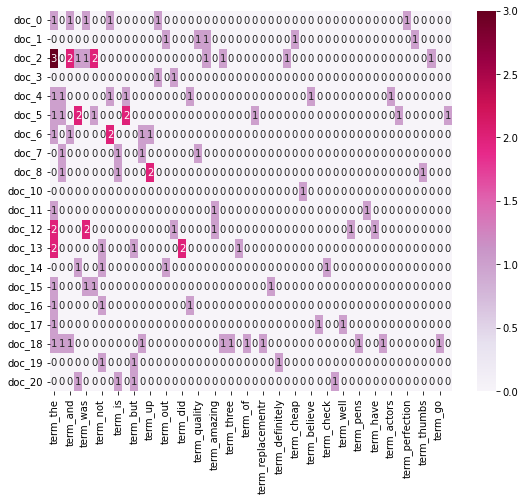

In [272]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=3, annot=True)